# Phase 1: Data Preparation & Exploration

This notebook performs initial data exploration and preparation for the water quality prediction challenge.

## Objectives
1. Load and inspect all datasets
2. Perform exploratory data analysis (EDA)
3. Conduct spatial and temporal analysis
4. Generate data quality report


## Step 1.1: Load and Inspect Data


In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial visualization
try:
    import folium
    from folium import plugins
    FOLIUM_AVAILABLE = True
except ImportError:
    FOLIUM_AVAILABLE = False
    print("Folium not available - interactive maps will be skipped")

# Spatial clustering
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")


Folium not available - interactive maps will be skipped
Libraries imported successfully


In [ ]:
# Load water quality training dataset
water_quality_df = pd.read_csv('water_quality_training_dataset.csv')
print(f"Water Quality Dataset Shape: {water_quality_df.shape}")
print(f"\nColumns: {list(water_quality_df.columns)}")
print(f"\nFirst few rows:")
water_quality_df.head()


Water Quality Dataset Shape: (9319, 6)

Columns: ['Latitude', 'Longitude', 'Sample Date', 'Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']

First few rows:


,Latitude,Longitude,Sample Date,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus
0,-28.760833,17.730278,02-01-2011,128.912,555.0,10.0
1,-26.861111,28.884722,03-01-2011,74.720,162.9,163.0
2,-26.450000,28.085833,03-01-2011,89.254,573.0,80.0
3,-27.671111,27.236944,03-01-2011,82.000,203.6,101.0
4,-27.356667,27.286389,03-01-2011,56.100,145.1,151.0


In [ ]:
# Load Landsat features
landsat_df = pd.read_csv('landsat_features_training.csv')
print(f"Landsat Features Shape: {landsat_df.shape}")
print(f"\nColumns: {list(landsat_df.columns)}")
print(f"\nFirst few rows:")
landsat_df.head()


Landsat Features Shape: (9319, 9)

Columns: ['Latitude', 'Longitude', 'Sample Date', 'nir', 'green', 'swir16', 'swir22', 'NDMI', 'MNDWI']

First few rows:


,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI
0,-28.760833,17.730278,02-01-2011,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595
1,-26.861111,28.884722,03-01-2011,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805
3,-27.671111,27.236944,03-01-2011,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416
4,-27.356667,27.286389,03-01-2011,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683


In [ ]:
# Load TerraClimate features
terraclimate_df = pd.read_csv('terraclimate_features_training.csv')
print(f"TerraClimate Features Shape: {terraclimate_df.shape}")
print(f"\nColumns: {list(terraclimate_df.columns)}")
print(f"\nFirst few rows:")
terraclimate_df.head()


TerraClimate Features Shape: (9319, 4)

Columns: ['Latitude', 'Longitude', 'Sample Date', 'pet']

First few rows:


,Latitude,Longitude,Sample Date,pet
0,-28.760833,17.730278,02-01-2011,174.2
1,-26.861111,28.884722,03-01-2011,124.1
2,-26.450000,28.085833,03-01-2011,127.5
3,-27.671111,27.236944,03-01-2011,129.7
4,-27.356667,27.286389,03-01-2011,129.2


In [ ]:
# Load validation template
validation_df = pd.read_csv('submission_template.csv')
print(f"Validation Template Shape: {validation_df.shape}")
print(f"\nColumns: {list(validation_df.columns)}")
print(f"\nFirst few rows:")
validation_df.head()


Validation Template Shape: (200, 6)

Columns: ['Latitude', 'Longitude', 'Sample Date', 'Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']

First few rows:


,Latitude,Longitude,Sample Date,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus
0,-32.043333,27.822778,01-09-2014,NaN,NaN,NaN
1,-33.329167,26.077500,16-09-2015,NaN,NaN,NaN
2,-32.991639,27.640028,07-05-2015,NaN,NaN,NaN
3,-34.096389,24.439167,07-02-2012,NaN,NaN,NaN
4,-32.000556,28.581667,01-10-2014,NaN,NaN,NaN


In [ ]:
# Generate data quality report
print("=" * 80)
print("DATA QUALITY REPORT")
print("=" * 80)

datasets = {
    'Water Quality': water_quality_df,
    'Landsat': landsat_df,
    'TerraClimate': terraclimate_df,
    'Validation': validation_df
}

for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(f"  Shape: {df.shape}")
    print(f"  Missing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing Count': missing.values,
        'Missing %': missing_pct.values
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))
    else:
        print("    No missing values")
    print(f"  Data Types:")
    print(df.dtypes.to_string())


DATA QUALITY REPORT

Water Quality Dataset:
  Shape: (9319, 6)
  Missing Values:
    No missing values
  Data Types:
Latitude                         float64
Longitude                        float64
Sample Date                       object
Total Alkalinity                 float64
Electrical Conductance           float64
Dissolved Reactive Phosphorus    float64

Landsat Dataset:
  Shape: (9319, 9)
  Missing Values:
Column  Missing Count  Missing %
   nir           1085   11.64288
 green           1085   11.64288
swir16           1085   11.64288
swir22           1085   11.64288
  NDMI           1085   11.64288
 MNDWI           1085   11.64288
  Data Types:
Latitude       float64
Longitude      float64
Sample Date     object
nir            float64
green          float64
swir16         float64
swir22         float64
NDMI           float64
MNDWI          float64

TerraClimate Dataset:
  Shape: (9319, 4)
  Missing Values:
    No missing values
  Data Types:
Latitude       float64
Longitude  

## Step 1.2: Exploratory Data Analysis (EDA)


In [ ]:
# Statistical summary of target variables
targets = ['Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']
print("Target Variables - Statistical Summary:")
print("=" * 80)
water_quality_df[targets].describe()


Target Variables - Statistical Summary:


,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus
count,9319.000000,9319.000000,9319.000000
mean,119.108208,485.004146,43.525338
std,74.692591,341.937736,50.980194
min,4.800000,15.120000,5.000000
25%,55.811000,207.050000,10.000000
50%,113.300000,402.000000,20.000000
75%,170.230000,693.000000,48.000000
max,361.676000,1506.000000,195.000000


## Histogram and Boxplot of Alkalinity, Electrical Conductance, and Dissolved Reactive Phosphorus

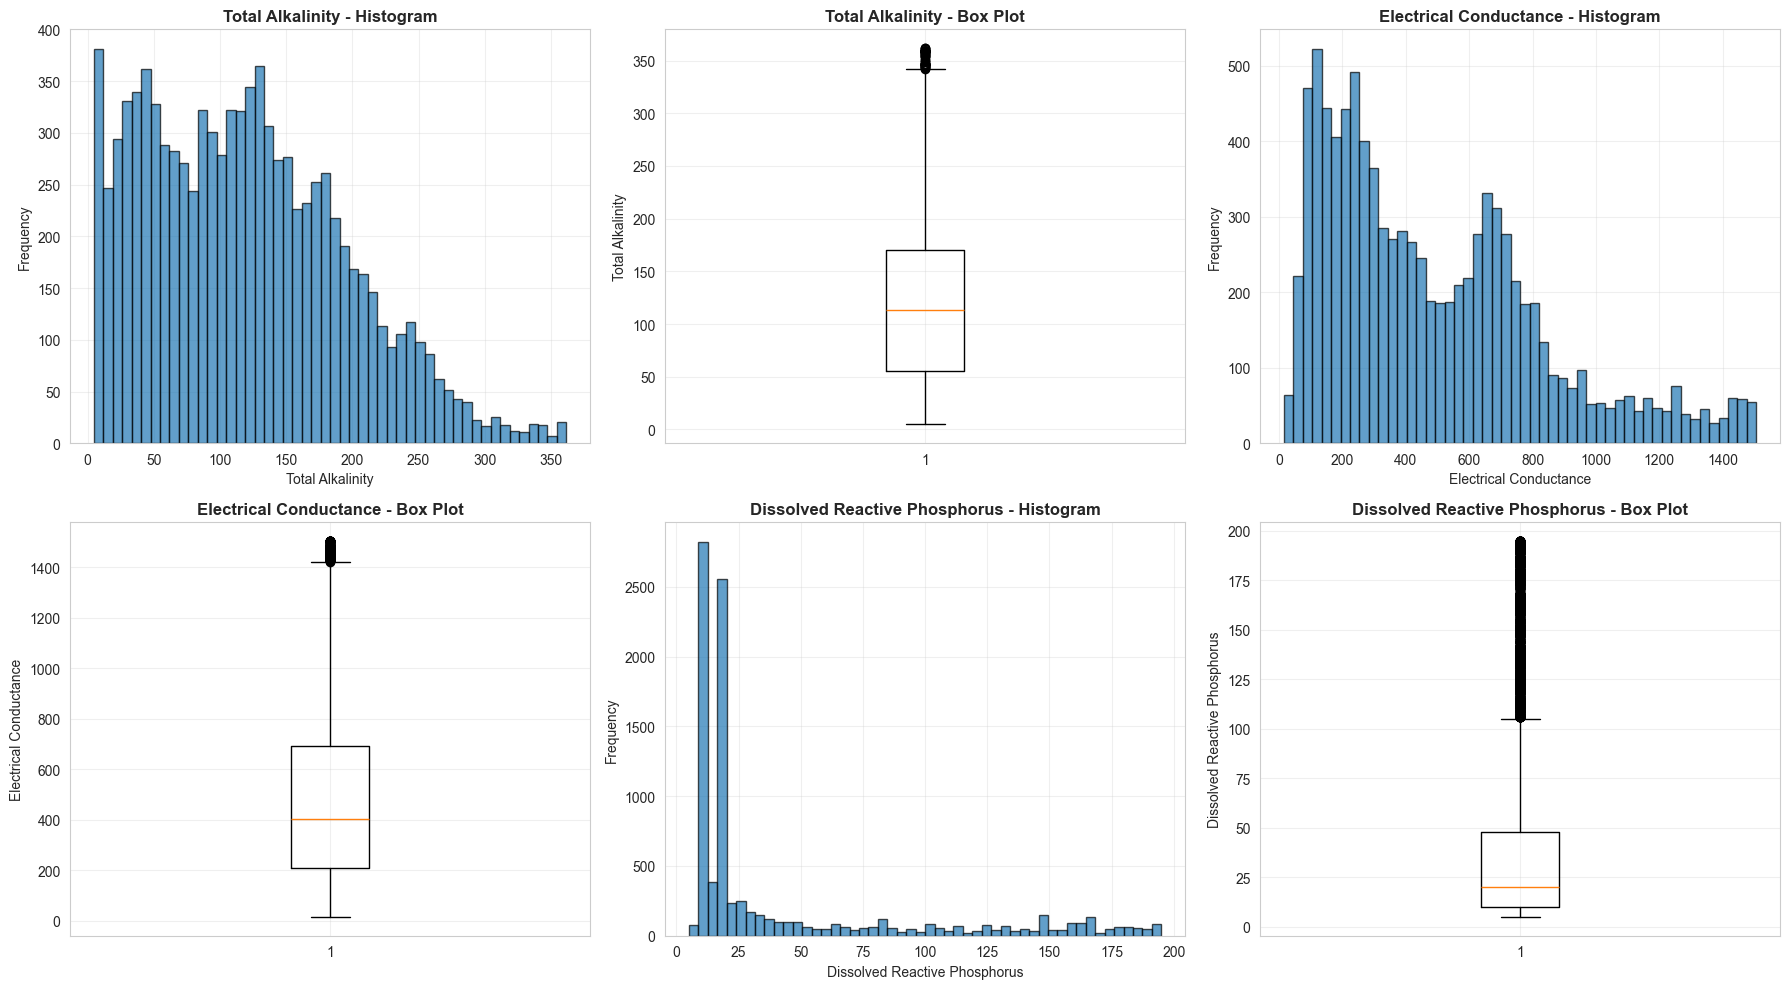

In [ ]:
# Distribution plots for target variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, target in enumerate(targets):
    # Histogram
    axes[i*2].hist(water_quality_df[target].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[i*2].set_title(f'{target} - Histogram', fontsize=12, fontweight='bold')
    axes[i*2].set_xlabel(target)
    axes[i*2].set_ylabel('Frequency')
    axes[i*2].grid(True, alpha=0.3)
    
    # Box plot
    axes[i*2+1].boxplot(water_quality_df[target].dropna(), vert=True)
    axes[i*2+1].set_title(f'{target} - Box Plot', fontsize=12, fontweight='bold')
    axes[i*2+1].set_ylabel(target)
    axes[i*2+1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('target_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


## Outliers

In [ ]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection (IQR Method):")
print("=" * 80)

outlier_summary = []
for target in targets:
    outliers, lower, upper = detect_outliers_iqr(water_quality_df, target)
    outlier_summary.append({
        'Variable': target,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outlier Count': len(outliers),
        'Outlier %': (len(outliers) / len(water_quality_df)) * 100
    })
    print(f"\n{target}:")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(water_quality_df)*100:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
print("\n" + "=" * 80)
print("Outlier Summary:")
print(outlier_df.to_string(index=False))


Outlier Detection (IQR Method):

Total Alkalinity:
  Bounds: [-115.82, 341.86]
  Outliers: 43 (0.46%)

Electrical Conductance:
  Bounds: [-521.88, 1421.92]
  Outliers: 169 (1.81%)

Dissolved Reactive Phosphorus:
  Bounds: [-47.00, 105.00]
  Outliers: 1398 (15.00%)

Outlier Summary:
                     Variable  Lower Bound  Upper Bound  Outlier Count  Outlier %
             Total Alkalinity    -115.8175     341.8585             43   0.461423
       Electrical Conductance    -521.8750    1421.9250            169   1.813499
Dissolved Reactive Phosphorus     -47.0000     105.0000           1398  15.001610


In [ ]:
# Domain knowledge outlier checks
print("Domain Knowledge Outlier Checks:")
print("=" * 80)

# Total Alkalinity: Good range is 20-200 mg/L, >500 is likely error
ta_invalid = water_quality_df[(water_quality_df['Total Alkalinity'] < 0) | 
                              (water_quality_df['Total Alkalinity'] > 500)]
print(f"\nTotal Alkalinity:")
print(f"  Invalid values (<0 or >500): {len(ta_invalid)} ({len(ta_invalid)/len(water_quality_df)*100:.2f}%)")

# Electrical Conductance: Good is <800 μS/cm, >5000 is likely error
ec_invalid = water_quality_df[(water_quality_df['Electrical Conductance'] < 0) | 
                             (water_quality_df['Electrical Conductance'] > 5000)]
print(f"\nElectrical Conductance:")
print(f"  Invalid values (<0 or >5000): {len(ec_invalid)} ({len(ec_invalid)/len(water_quality_df)*100:.2f}%)")

# Dissolved Reactive Phosphorus: Good is <100 μg/L, >500 is extreme pollution
drp_invalid = water_quality_df[(water_quality_df['Dissolved Reactive Phosphorus'] < 0) | 
                               (water_quality_df['Dissolved Reactive Phosphorus'] > 500)]
print(f"\nDissolved Reactive Phosphorus:")
print(f"  Invalid values (<0 or >500): {len(drp_invalid)} ({len(drp_invalid)/len(water_quality_df)*100:.2f}%)")


Domain Knowledge Outlier Checks:

Total Alkalinity:
  Invalid values (<0 or >500): 0 (0.00%)

Electrical Conductance:
  Invalid values (<0 or >5000): 0 (0.00%)

Dissolved Reactive Phosphorus:
  Invalid values (<0 or >500): 0 (0.00%)


## Correlation of Response Variables with Each Other. Electrical Conductance and Total Alkalinity are somewhat Correlated

Target Variables - Correlation Matrix:
                               Total Alkalinity  Electrical Conductance  \
Total Alkalinity                       1.000000                0.692436   
Electrical Conductance                 0.692436                1.000000   
Dissolved Reactive Phosphorus          0.316777                0.279405   

                               Dissolved Reactive Phosphorus  
Total Alkalinity                                    0.316777  
Electrical Conductance                              0.279405  
Dissolved Reactive Phosphorus                       1.000000  


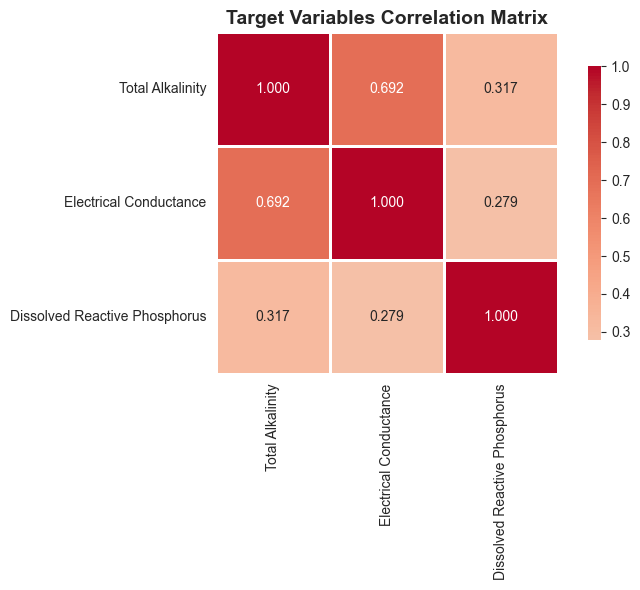

In [ ]:
# Correlation analysis: Targets vs Targets
print("Target Variables - Correlation Matrix:")
print("=" * 80)
target_corr = water_quality_df[targets].corr()
print(target_corr)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Target Variables Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


## Response Variables Correlation with the Features. 
# Total Alkalinity -> PET; NDMI
# Electrical Conductance -> PET (strong positive correlation) Explaination, PET measures atmosphere's thirst for water. Higher PET = Dryer climate. Dryer climeate means water is evaporating quicker leading to more salt ions in the water. EC is measure of ions
# Dissolved Reactive Phosphorus -> NDMI (almost neglible)

Merged dataset shape: (9319, 18)

Features available: ['Year_x', 'Month_x', 'Cluster', 'nir', 'green', 'swir16', 'swir22', 'NDMI', 'MNDWI', 'Year_y', 'Month_y', 'pet']

Feature-Target Correlations:
        Total Alkalinity  Electrical Conductance  \
nir             0.015579                0.037289   
green           0.061622                0.028293   
swir16          0.191913                0.144659   
swir22          0.211446                0.159797   
NDMI           -0.274070               -0.177506   
MNDWI          -0.154614               -0.141569   
pet             0.263515                0.322811   

        Dissolved Reactive Phosphorus  
nir                         -0.004762  
green                        0.008321  
swir16                       0.059861  
swir22                       0.065900  
NDMI                        -0.085012  
MNDWI                       -0.048319  
pet                          0.062566  


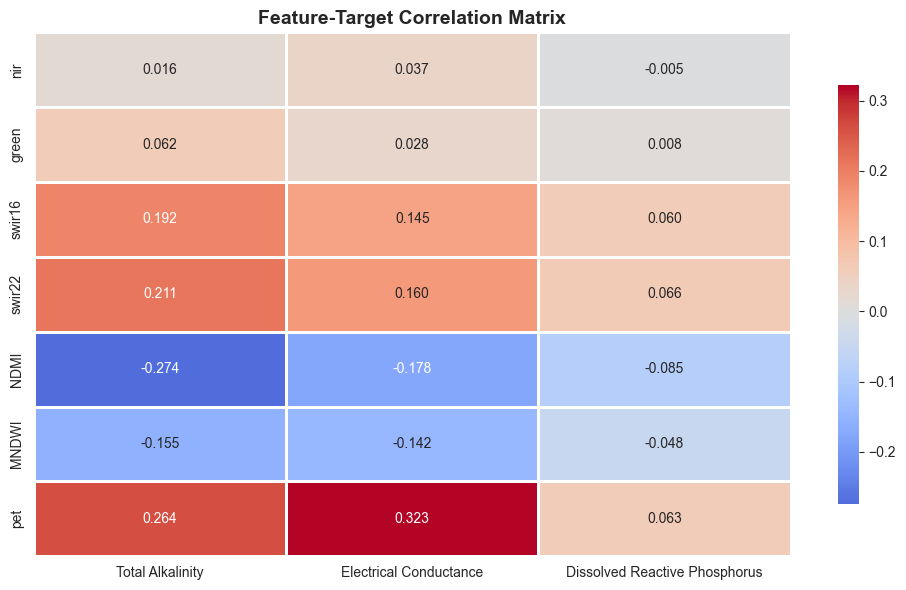

In [ ]:
# Merge datasets to analyze feature correlations
# Combine on Latitude, Longitude, Sample Date
# First, ensure Sample Date columns are all datetime type for proper merging
landsat_df_merge = landsat_df.copy()
terraclimate_df_merge = terraclimate_df.copy()

# Convert Sample Date to datetime if not already
landsat_df_merge['Sample Date'] = pd.to_datetime(landsat_df_merge['Sample Date'], dayfirst=True, errors='coerce')
terraclimate_df_merge['Sample Date'] = pd.to_datetime(terraclimate_df_merge['Sample Date'], dayfirst=True, errors='coerce')

# Ensure targets is defined
if 'targets' not in locals():
    targets = ['Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']

merged_df = water_quality_df.merge(
    landsat_df_merge,
    on=['Latitude', 'Longitude', 'Sample Date'],
    how='inner'
).merge(
    terraclimate_df_merge,
    on=['Latitude', 'Longitude', 'Sample Date'],
    how='inner'
)

print(f"Merged dataset shape: {merged_df.shape}")
print(f"\nFeatures available: {[col for col in merged_df.columns if col not in targets + ['Latitude', 'Longitude', 'Sample Date']]}")

# Correlation: Features vs Targets
feature_cols = ['nir', 'green', 'swir16', 'swir22', 'NDMI', 'MNDWI', 'pet']
# Only use columns that exist in merged_df
available_features = [col for col in feature_cols if col in merged_df.columns]
corr_with_targets = merged_df[available_features + targets].corr()[targets].drop(targets)

print("\n" + "=" * 80)
print("Feature-Target Correlations:")
print("=" * 80)
print(corr_with_targets)

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_targets, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=False, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature-Target Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# Missing Values in Landsat Data

In [ ]:
# Analyze missing value patterns in Landsat data
print("Missing Value Patterns in Landsat Features:")
print("=" * 80)

landsat_bands = ['nir', 'green', 'swir16', 'swir22']
for band in landsat_bands:
    missing_count = landsat_df[band].isnull().sum()
    missing_pct = (missing_count / len(landsat_df)) * 100
    print(f"{band}: {missing_count} missing ({missing_pct:.2f}%)")

# Check if missing values are correlated (same locations missing multiple bands)
missing_matrix = landsat_df[landsat_bands].isnull()
print("\nMissing Value Co-occurrence:")
print(missing_matrix.sum(axis=1).value_counts().sort_index())

# Temporal analysis of missing values
landsat_df['Sample Date'] = pd.to_datetime(landsat_df['Sample Date'], dayfirst=True, errors='coerce')
landsat_df['Year'] = landsat_df['Sample Date'].dt.year
landsat_df['Month'] = landsat_df['Sample Date'].dt.month

print("\nMissing values by year:")
for year in sorted(landsat_df['Year'].dropna().unique()):
    year_data = landsat_df[landsat_df['Year'] == year]
    missing = year_data[landsat_bands].isnull().sum().sum()
    total = len(year_data) * len(landsat_bands)
    print(f"  {int(year)}: {missing}/{total} ({missing/total*100:.2f}%)")

print("\nMissing values by month:")
for month in sorted(landsat_df['Month'].dropna().unique()):
    month_data = landsat_df[landsat_df['Month'] == month]
    missing = month_data[landsat_bands].isnull().sum().sum()
    total = len(month_data) * len(landsat_bands)
    print(f"  Month {int(month)}: {missing}/{total} ({missing/total*100:.2f}%)")


Missing Value Patterns in Landsat Features:
nir: 1085 missing (11.64%)
green: 1085 missing (11.64%)
swir16: 1085 missing (11.64%)
swir22: 1085 missing (11.64%)

Missing Value Co-occurrence:
0    8234
4    1085
Name: count, dtype: int64

Missing values by year:
  2011: 1024/6408 (15.98%)
  2012: 1412/7024 (20.10%)
  2013: 668/7804 (8.56%)
  2014: 680/8336 (8.16%)
  2015: 556/7704 (7.22%)

Missing values by month:
  Month 1: 376/2892 (13.00%)
  Month 2: 356/2964 (12.01%)
  Month 3: 360/3212 (11.21%)
  Month 4: 356/3096 (11.50%)
  Month 5: 292/3316 (8.81%)
  Month 6: 340/3280 (10.37%)
  Month 7: 292/3232 (9.03%)
  Month 8: 348/3240 (10.74%)
  Month 9: 392/3308 (11.85%)
  Month 10: 464/3432 (13.52%)
  Month 11: 484/3156 (15.34%)
  Month 12: 280/2148 (13.04%)


## Step 1.3: Spatial and Temporal Analysis


In [ ]:
# Temporal analysis
water_quality_df['Sample Date'] = pd.to_datetime(water_quality_df['Sample Date'], dayfirst=True, errors='coerce')
water_quality_df['Year'] = water_quality_df['Sample Date'].dt.year
water_quality_df['Month'] = water_quality_df['Sample Date'].dt.month

print("Temporal Distribution:")
print("=" * 80)
print(f"Date range: {water_quality_df['Sample Date'].min()} to {water_quality_df['Sample Date'].max()}")
print(f"\nSamples by year:")
print(water_quality_df['Year'].value_counts().sort_index())
print(f"\nSamples by month:")
print(water_quality_df['Month'].value_counts().sort_index())


Temporal Distribution:
Date range: 2011-01-02 00:00:00 to 2015-12-31 00:00:00

Samples by year:
Year
2011    1602
2012    1756
2013    1951
2014    2084
2015    1926
Name: count, dtype: int64

Samples by month:
Month
1     723
2     741
3     803
4     774
5     829
6     820
7     808
8     810
9     827
10    858
11    789
12    537
Name: count, dtype: int64


## Seasonal Patters in Target Variables

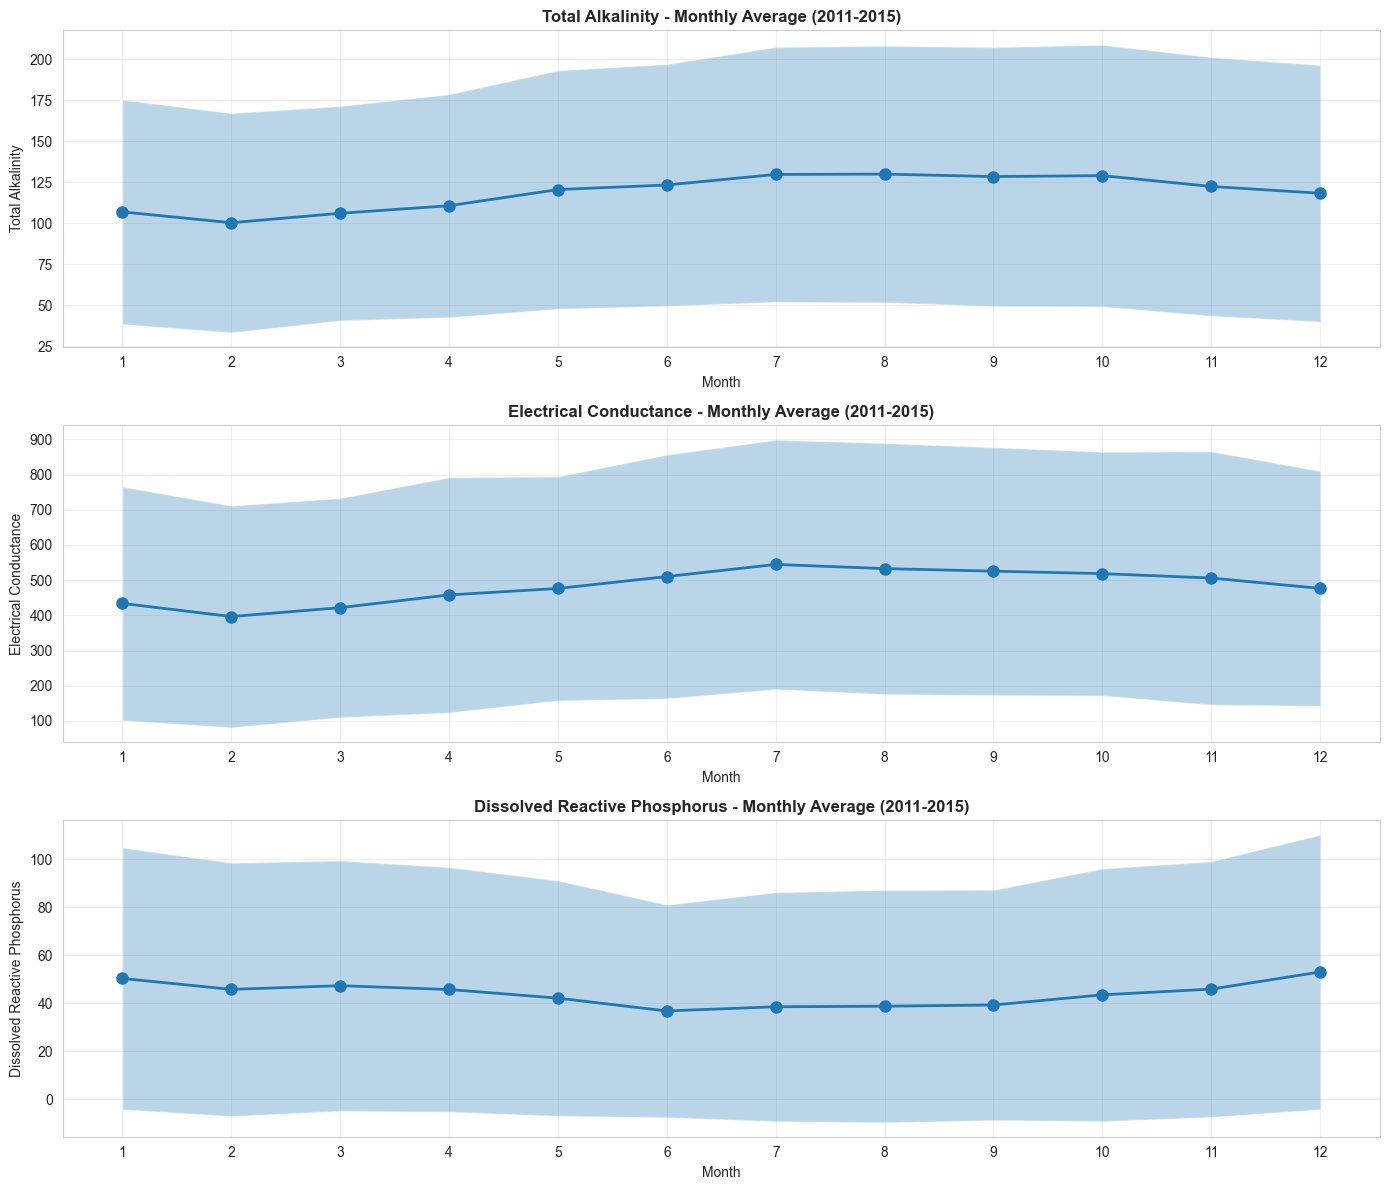

In [ ]:
# Seasonal patterns in target variables
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for i, target in enumerate(targets):
    monthly_avg = water_quality_df.groupby('Month')[target].mean()
    monthly_std = water_quality_df.groupby('Month')[target].std()
    
    axes[i].plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
    axes[i].fill_between(monthly_avg.index, 
                        monthly_avg.values - monthly_std.values,
                        monthly_avg.values + monthly_std.values,
                        alpha=0.3)
    axes[i].set_title(f'{target} - Monthly Average (2011-2015)', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(target)
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()


# Yearly Trends for the Target Variables (Barely any changes from year to year)

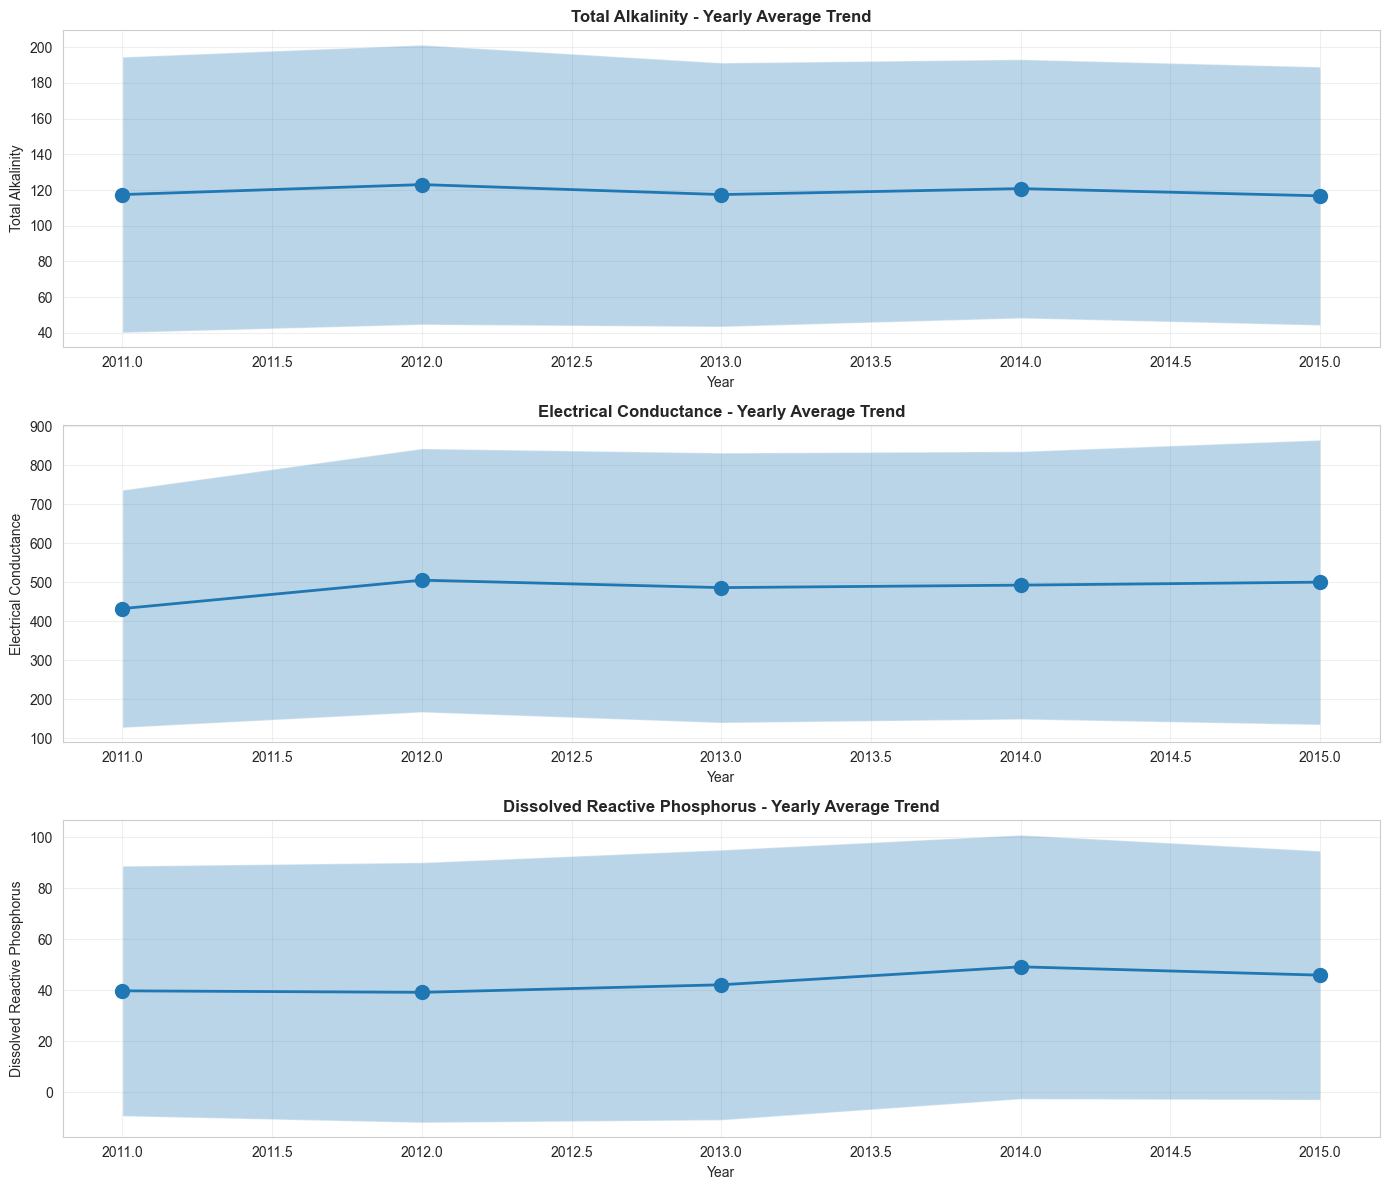

In [ ]:
# Temporal trends (yearly averages)
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for i, target in enumerate(targets):
    yearly_avg = water_quality_df.groupby('Year')[target].mean()
    yearly_std = water_quality_df.groupby('Year')[target].std()
    
    axes[i].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=10)
    axes[i].fill_between(yearly_avg.index,
                        yearly_avg.values - yearly_std.values,
                        yearly_avg.values + yearly_std.values,
                        alpha=0.3)
    axes[i].set_title(f'{target} - Yearly Average Trend', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()


# Spatial Distribution for Target Variables. Coordinates for different locations and the levels of the Target Variables

Spatial Distribution:
Latitude range: -34.4058 to -22.2256
Longitude range: 17.7303 to 32.3250

Number of unique locations: 162

Spatial spread:
  Mean distance between locations: 6.2483 degrees


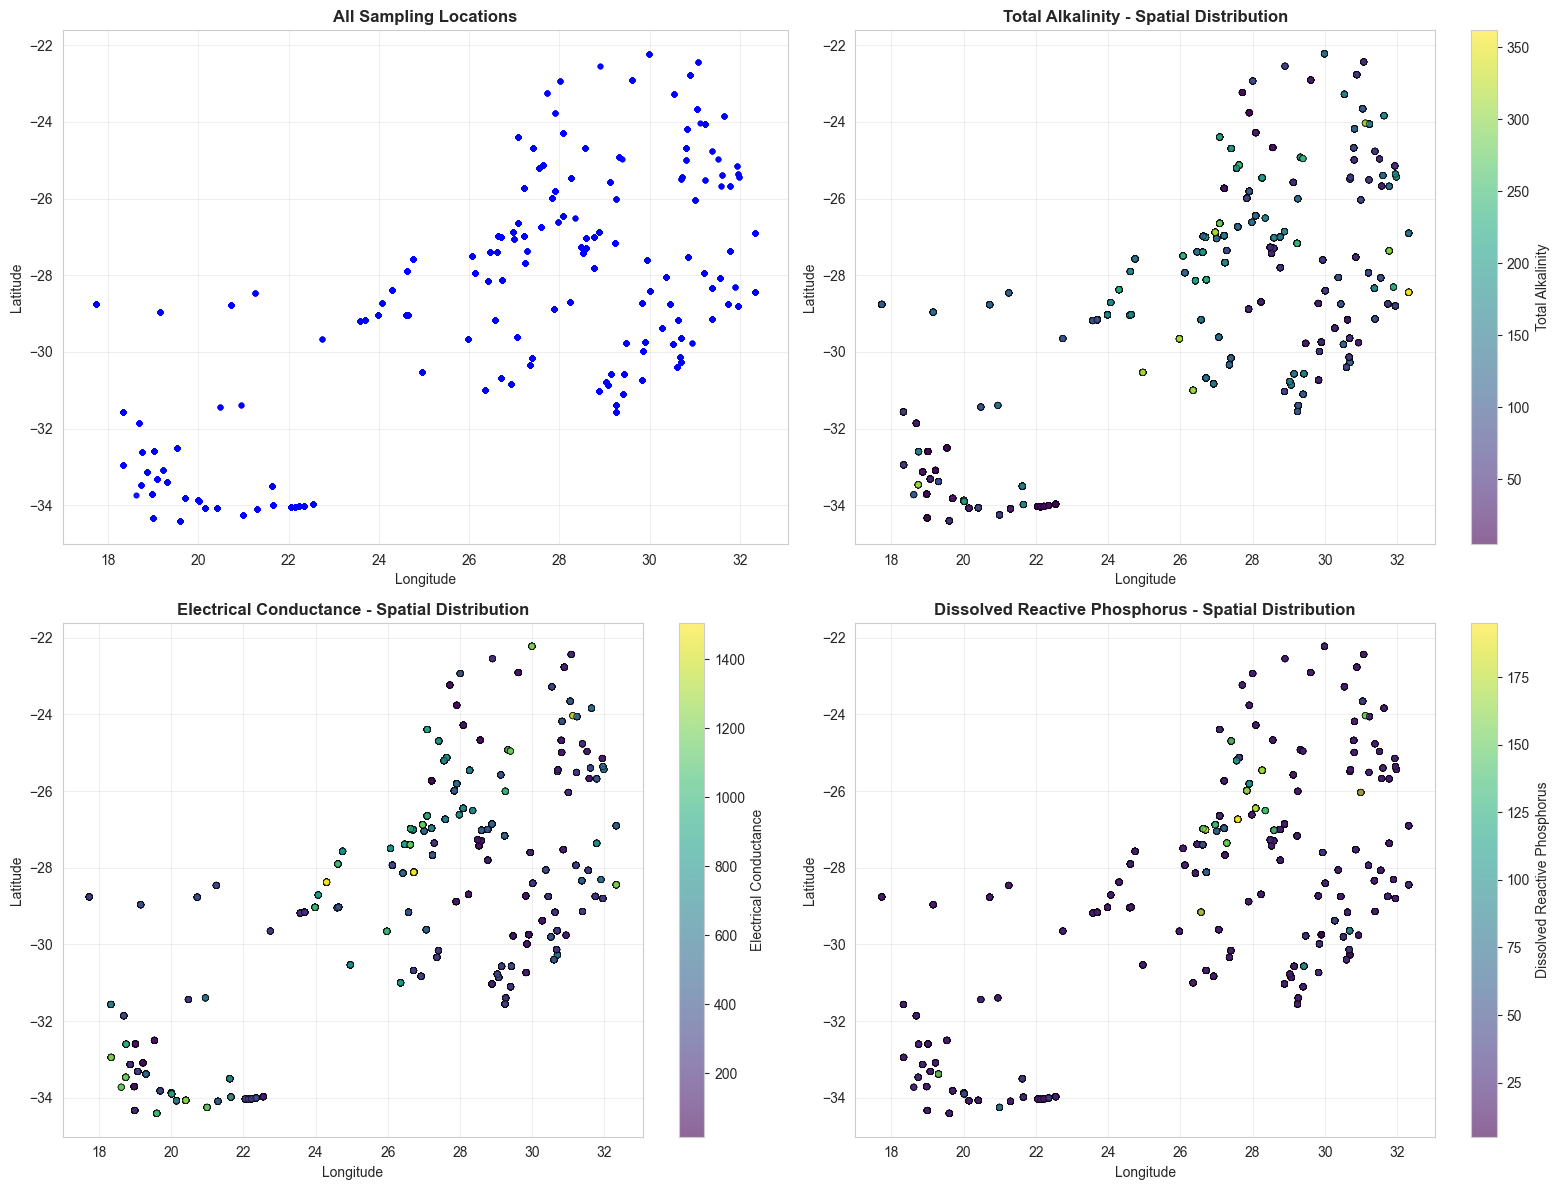

In [ ]:
# Spatial distribution analysis
print("Spatial Distribution:")
print("=" * 80)
print(f"Latitude range: {water_quality_df['Latitude'].min():.4f} to {water_quality_df['Latitude'].max():.4f}")
print(f"Longitude range: {water_quality_df['Longitude'].min():.4f} to {water_quality_df['Longitude'].max():.4f}")
print(f"\nNumber of unique locations: {len(water_quality_df[['Latitude', 'Longitude']].drop_duplicates())}")

# Check for spatial clustering
unique_locs = water_quality_df[['Latitude', 'Longitude']].drop_duplicates()
print(f"\nSpatial spread:")
print(f"  Mean distance between locations: {distance_matrix(unique_locs.values, unique_locs.values).mean():.4f} degrees")

# Create spatial scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot 1: All locations
axes[0].scatter(water_quality_df['Longitude'], water_quality_df['Latitude'], 
               alpha=0.3, s=10, c='blue')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('All Sampling Locations', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2-4: Color by target values
for i, target in enumerate(targets, 1):
    scatter = axes[i].scatter(water_quality_df['Longitude'], water_quality_df['Latitude'],
                            c=water_quality_df[target], cmap='viridis',
                            alpha=0.6, s=20, edgecolors='black', linewidth=0.5)
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].set_title(f'{target} - Spatial Distribution', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[i], label=target)

plt.tight_layout()
plt.savefig('spatial_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


# Spatial Clusters
# Identifies natural geographic groupings
# Chooses optimal number using elbow method
# Assigns each sample to a spatial cluster
# Adds cluster as a new feature

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 0) Clean up any previous cluster columns created by earlier merges ---
cluster_cols = [c for c in water_quality_df.columns if c.startswith("Cluster")]
if cluster_cols:
    water_quality_df = water_quality_df.drop(columns=cluster_cols)

# --- 1) Unique locations (stable) ---
unique_locs = (
    water_quality_df[['Latitude', 'Longitude']]
    .drop_duplicates()
    .reset_index(drop=True)
)

# Ensure coordinates are numeric (prevents silent merge/type issues)
water_quality_df['Latitude'] = pd.to_numeric(water_quality_df['Latitude'], errors='coerce')
water_quality_df['Longitude'] = pd.to_numeric(water_quality_df['Longitude'], errors='coerce')
unique_locs['Latitude'] = pd.to_numeric(unique_locs['Latitude'], errors='coerce')
unique_locs['Longitude'] = pd.to_numeric(unique_locs['Longitude'], errors='coerce')

# Optionally drop rows with missing coords (KMeans can't handle NaNs)
unique_locs = unique_locs.dropna(subset=['Latitude', 'Longitude']).reset_index(drop=True)

coords = unique_locs[['Latitude', 'Longitude']].to_numpy()

# --- 2) Elbow curve ---
n_clusters_range = range(5, 16)
inertias = []

for n in n_clusters_range:
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(coords)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(list(n_clusters_range), inertias, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Spatial Clusters', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('spatial_clustering_elbow.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 3) Fit final KMeans ---
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
unique_locs['Cluster'] = kmeans.fit_predict(coords)

# --- 4) Merge clusters back (safe) ---
# Use validate='m:1' because many samples map to one location/cluster
water_quality_df = water_quality_df.merge(
    unique_locs[['Latitude', 'Longitude', 'Cluster']],
    on=['Latitude', 'Longitude'],
    how='left',
    validate='m:1'
)

print(f"\nSpatial clusters identified: {optimal_clusters}")
print("Samples per cluster:")
print(water_quality_df['Cluster'].value_counts(dropna=False).sort_index())


## Summary and Next Steps

### Key Findings:
1. **Data Quality**: [Summary of missing values, outliers, etc.]
2. **Target Distributions**: [Summary of TA, EC, DRP distributions]
3. **Spatial Patterns**: [Summary of spatial clustering]
4. **Temporal Patterns**: [Summary of seasonal/trend patterns]

### Next Steps (Phase 2):
- Extract additional TerraClimate variables
- Compute enhanced Landsat spectral indices
- Extract spatial features (elevation, land cover)
- Create temporal features
- Combine all features into single dataset


In [ ]:
# Save processed data with temporal and spatial features for next phase
water_quality_df.to_csv('water_quality_training_processed.csv', index=False)
print("Processed water quality data saved to 'water_quality_training_processed.csv'")
print(f"\nNew columns added: Year, Month, Cluster")
print(f"Final shape: {water_quality_df.shape}")


Processed water quality data saved to 'water_quality_training_processed.csv'

New columns added: Year, Month, Cluster
Final shape: (9319, 11)
